In [9]:
import numpy as np
import pandas as pd
from nltk.translate.bleu_score import sentence_bleu
from spacy.lang.en.examples import sentences 
import spacy as sp
import nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
# import zipfile
from textblob import TextBlob
import string
from datetime import datetime  
from datetime import timedelta  
import re 
import matplotlib.pyplot as plt


In [2]:
stock = pd.read_csv('data/SP500_intraday.csv')
stock['Time_pd'] = pd.to_timedelta(stock['Time']+':00')
stock['Date_time'] = pd.to_datetime(pd.to_datetime(stock['Date'])+ pd.to_timedelta(stock['Time_pd']))
stock.head()

,Date,Time,Open,High,Low,Close,Volume,Tick Count,Up Ticks,Down Ticks,Same Ticks,VWAP,Time_pd,Date_time
0,11/13/16,17:01,2183.00,2183.50,2182.25,2183.25,2536,326,66,63,197,2183.03,17:01:00,2016-11-13 17:01:00
1,11/13/16,17:02,2183.25,2183.25,2182.00,2182.00,891,141,18,23,100,2182.93,17:02:00,2016-11-13 17:02:00
2,11/13/16,17:03,2182.00,2182.75,2182.00,2182.75,326,71,15,12,44,2182.27,17:03:00,2016-11-13 17:03:00
3,11/13/16,17:04,2182.50,2182.75,2182.50,2182.50,50,35,7,8,20,2182.57,17:04:00,2016-11-13 17:04:00
4,11/13/16,17:05,2182.75,2183.00,2182.75,2183.00,232,33,8,6,19,2182.92,17:05:00,2016-11-13 17:05:00


In [3]:
test_df = pd.read_csv('data/preprocessed', usecols = ['created_at', 'stock_up'])
stock['Date_time'].loc[stock['Date_time'] == test_df['created_at'][0]].index[0]


105

1003747.0

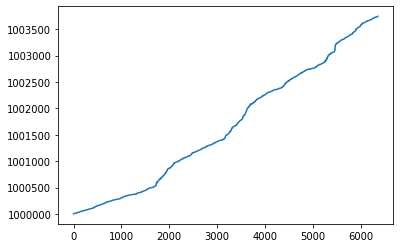

In [27]:
def evaluate(pred_df, stock_df, cash = 1000000, portfolio = 1000):
    pred_df['created_at'] = pd.to_datetime(pred_df['created_at'])
    cash_steps = []
    for i in range(len(pred_df)):
        current_time = pred_df['created_at'][i]
        #Gets index within stock dataframe of current time
        stock_time_idx = stock_df['Date_time'].loc[stock_df['Date_time'] == current_time].index[0]
        future_time = current_time + timedelta(minutes=5)  
        future_stock_time_idx = stock_df['Date_time'].loc[stock_df['Date_time'] == future_time].index[0]
        if pred_df['stock_up'][i] == 1:
            #Buy Close now and sell Open in five minutes
            cost_of_trans = stock_df['Open'][future_stock_time_idx] - stock_df['Close'][stock_time_idx] 
            cash = cash + cost_of_trans
        elif pred_df['stock_up'][i] == 0:
            #Sell Close now and Buy Open in five minutes 
            cost_of_trans = stock_df['Close'][stock_time_idx] - stock_df['Open'][future_stock_time_idx] 
            cash = cash + cost_of_trans
        cash_steps.append(cash)
    timesteps = [j for j in range(len(pred_df))]
    plt.plot(timesteps, cash_steps)
    return cash
evaluate(test_df, stock)